In [1]:
!pip install folium

In [2]:
!pip install xlrd

In [3]:
!pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [5]:
import os

In [6]:
os.chdir("C:\\Users\\Rajshah")

In [7]:
df = pd.read_csv("C:\\Users\\Rajshah\\zomato-bangalore-restaurants\\zomato.csv")

In [8]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [9]:
df.shape

(51717, 17)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

In [11]:
# deleting unneccessary columns
del df['url']
del df['address']
del df['phone']
del df['reviews_list']
del df['menu_item']

In [12]:
df['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.0 /5       7
2.2 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

In [13]:
df['rate'].isnull().sum()

7775

In [14]:
df['rate'] = df['rate'].apply(lambda x: str(x).split('/')[0])

In [15]:
df = df.rename(columns = {"approx_cost(for two people)":"Avg_cost","listed_in(city)":"city","listed_in(type)":"meal_type"})

In [16]:
df['city'].value_counts()

BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Whitefield               1620
Residency Road           1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: city, dtype: int64

In [17]:
df['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [18]:
df['city'].isnull().sum()

0

In [19]:
df['location'].isnull().sum()

21

In [20]:
del df['location']

In [21]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate                0
votes               0
rest_type         227
dish_liked      28078
cuisines           45
Avg_cost          346
meal_type           0
city                0
dtype: int64

In [22]:
len(df['city'].value_counts())

30

In [23]:
!pip install seaborn

In [24]:
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt

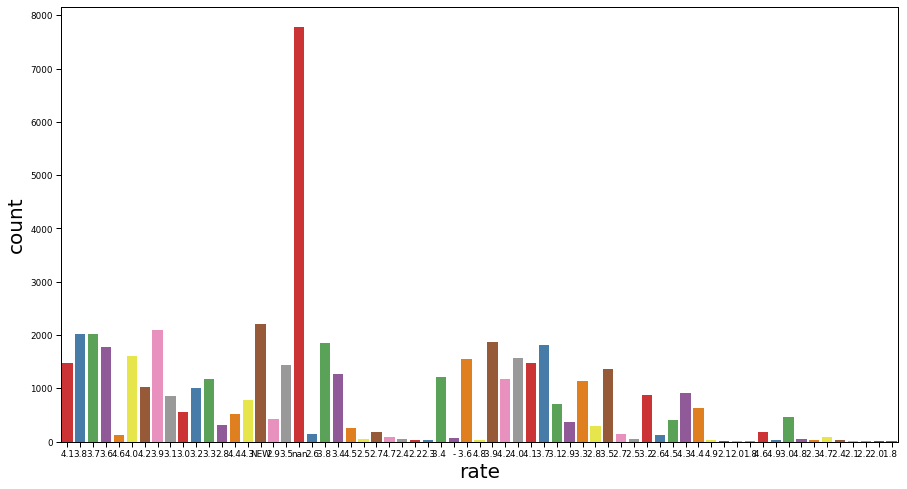

In [51]:
plt.rcParams['figure.figsize'] = 15,8
sns.countplot(df['rate'],palette = 'Set1')
plt.show()

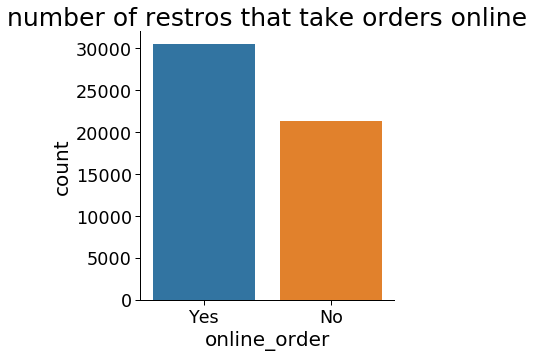

In [30]:
sns.set_context("paper", font_scale =2,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
sns.catplot(data = df, kind='count', x = 'online_order')
plt.title('number of restros that take orders online')
plt.show()

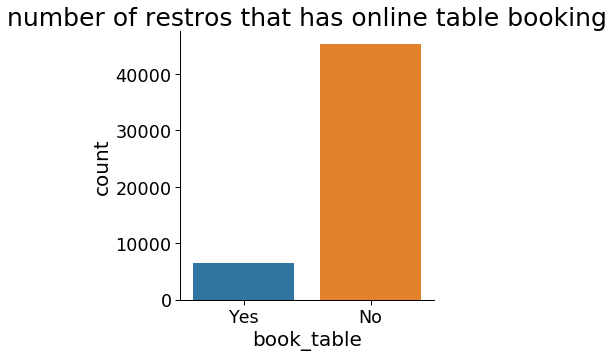

In [31]:
sns.set_context("paper", font_scale =2,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
sns.catplot(data = df, kind='count', x = 'book_table')
plt.title('number of restros that has online table booking')
plt.show()

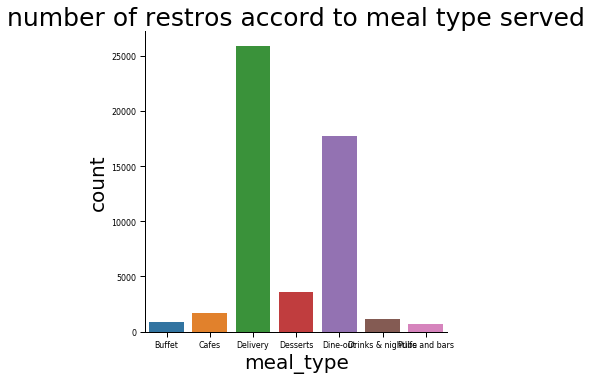

In [53]:
sns.set_context("paper", font_scale =0.9,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b =sns.catplot(data = df, kind='count', x = 'meal_type')
plt.title('number of restros accord to meal type served')
plt.show()

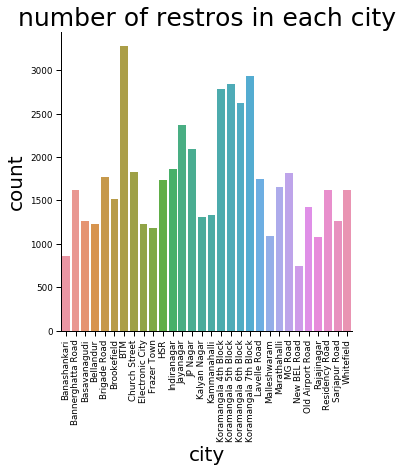

In [49]:
sns.set_context("paper", font_scale =1,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b=sns.catplot(data = df, kind='count', x = 'city')
plt.title('number of restros in each city')
b.set_xticklabels(rotation=90)
plt.show()

In [54]:
a = list(df['rate'])
for i in range(0,len(a)):
    if a[i] =='nan':
        a[i] = 'unrated'
    elif a[i]=='-':
        a[i] = 'unrated'
    if a[i] == 'NEW':
        a[i] = 'unrated'

In [55]:
df['rate'] = a

In [56]:
df['rate'].value_counts()

unrated    10052
3.9         2098
3.8         2022
3.7         2011
3.9         1874
           ...  
2.0            7
2.2            7
2.0            4
1.8            3
1.8            2
Name: rate, Length: 63, dtype: int64

In [58]:
a = list(df['rate'])
for i in range(0, len(a)):
    if a[i] == 'unrated':
        a[i]=None
    else:
        a[i] = float(a[i])
df['rate']= a

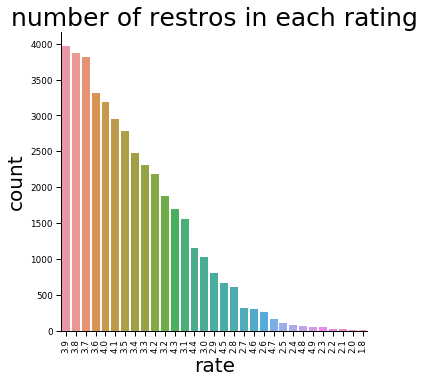

In [59]:
sns.set_context("paper", font_scale =1,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b=sns.catplot(data = df, kind='count', x = 'rate', order = df['rate'].value_counts().index)
plt.title('number of restros in each rating')
b.set_xticklabels(rotation=90)
plt.show()

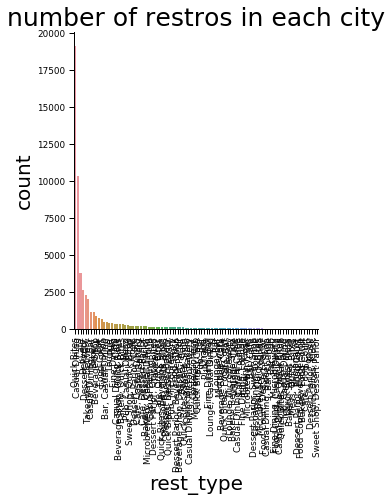

In [85]:
b=sns.catplot(data = df, kind='count', x = 'rest_type', order=df['rest_type'].value_counts().index)
plt.title('number of restros in each city')
b.set_xticklabels(rotation=90)
plt.show()

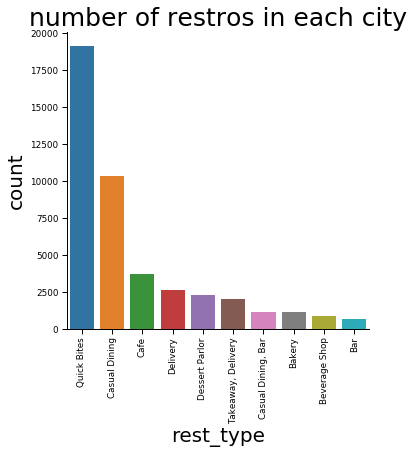

In [76]:
sns.set_context("paper", font_scale =1,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b=sns.catplot(data = df, kind='count', x = 'rest_type', order=df['rest_type'].value_counts().head(10).index)
plt.title('number of restros in each city')
b.set_xticklabels(rotation=90)
plt.show()

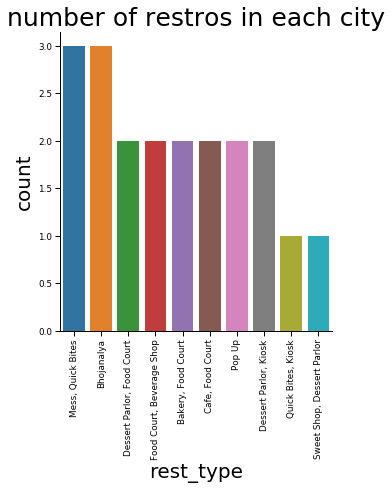

In [77]:
sns.set_context("paper", font_scale =1,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b=sns.catplot(data = df, kind='count', x = 'rest_type', order=df['rest_type'].value_counts().tail(.index)
plt.title('number of restros in each city')
b.set_xticklabels(rotation=90)
plt.show()

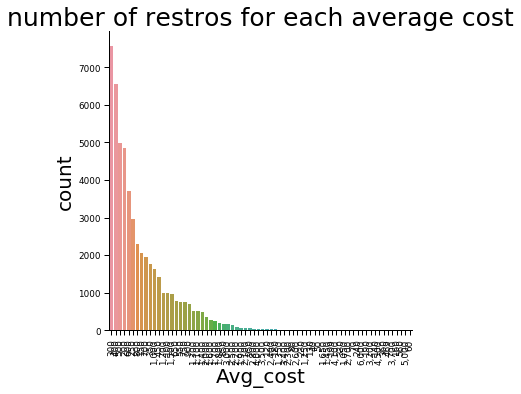

In [84]:
b =sns.catplot(data = df, kind='count', x = 'Avg_cost', order=df['Avg_cost'].value_counts().index)
plt.title('number of restros for each average cost')
b.set_xticklabels(rotation=90)
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_xticklables'

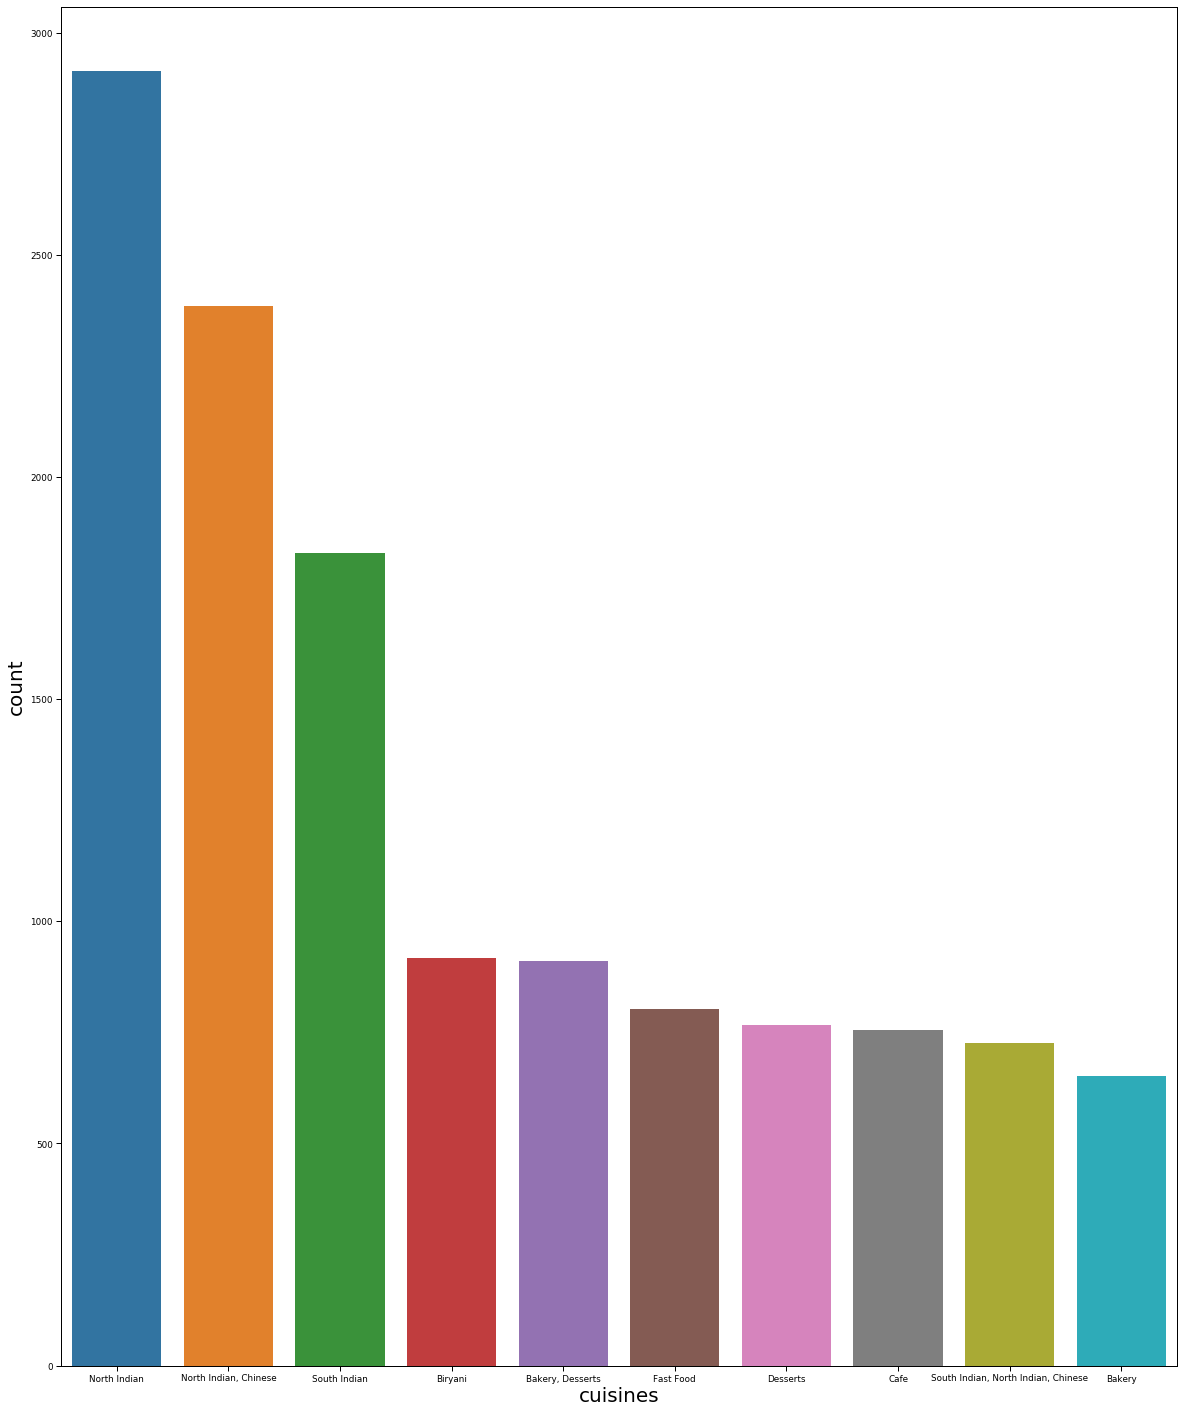

In [83]:
b=sns.countplot(data = df, x = 'cuisines', order=df['cuisines'].value_counts().iloc[:10].index)
b.set_xticklabels(b.get_xticklables(),rotation=90)
plt.title("top 10 cuisines with max number of restros")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_xticklables'

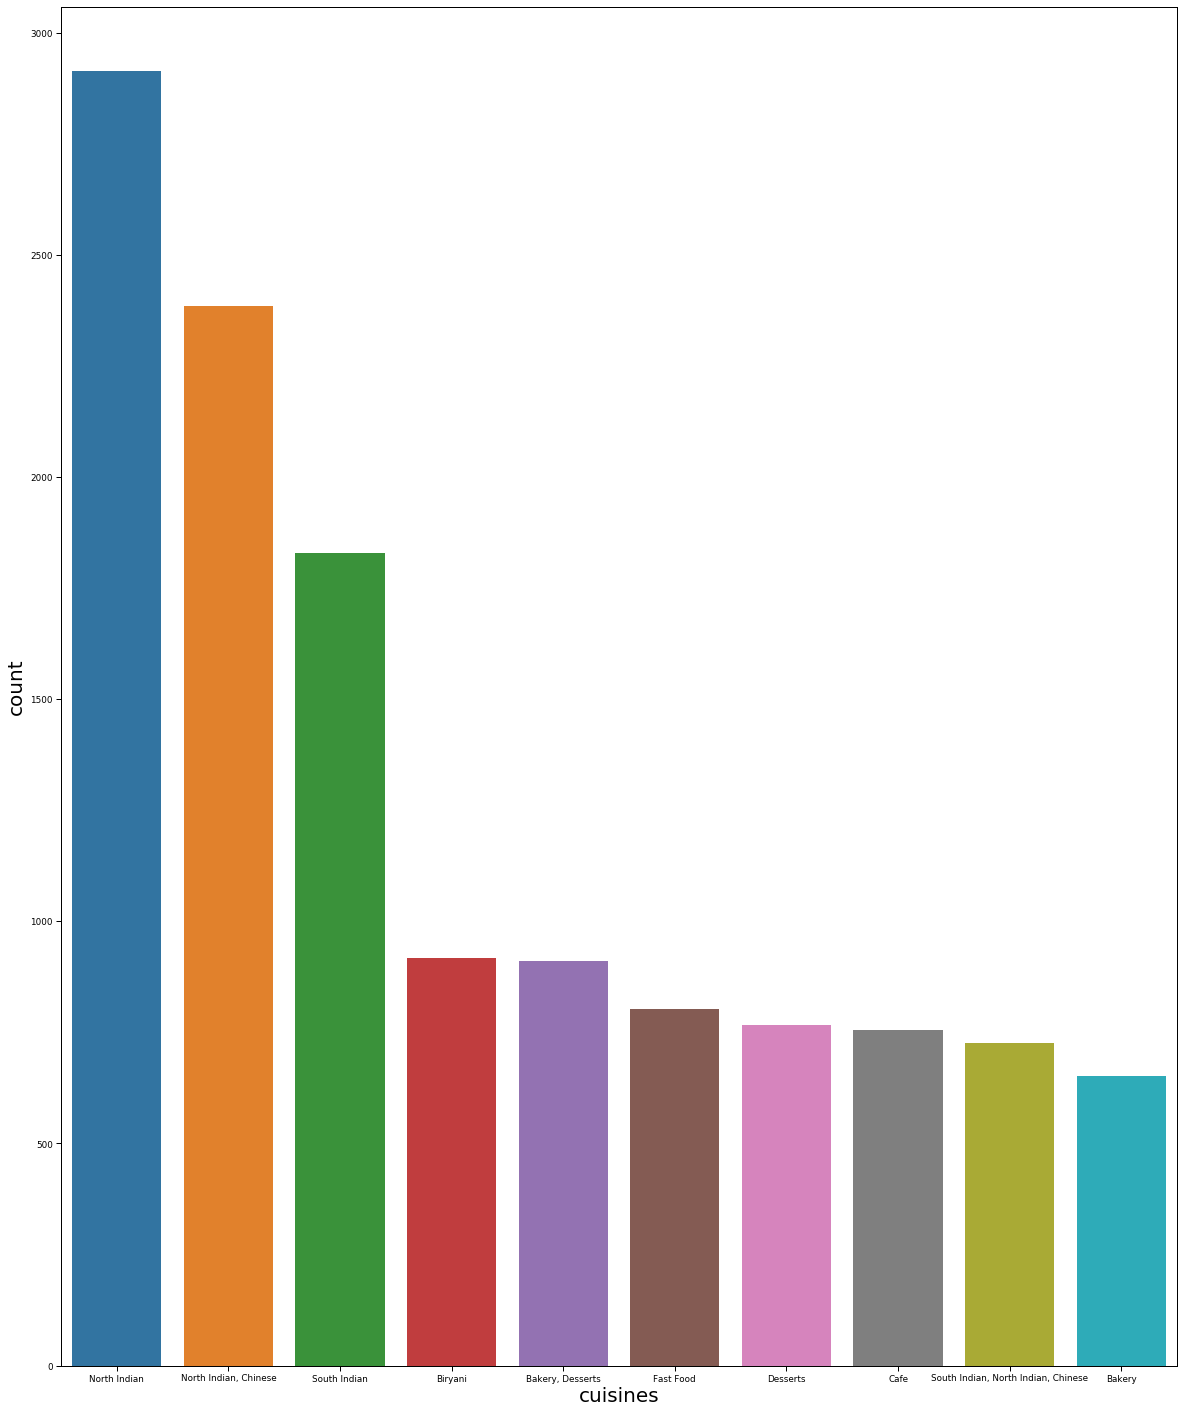

In [86]:
b=sns.countplot(data = df, x = 'cuisines', order=df['cuisines'].value_counts().head(10).iloc[:10].index)
b.set_xticklabels(b.get_xticklables(),rotation=90)
plt.title("top 10 cuisines with max number of restros")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_xticklables'

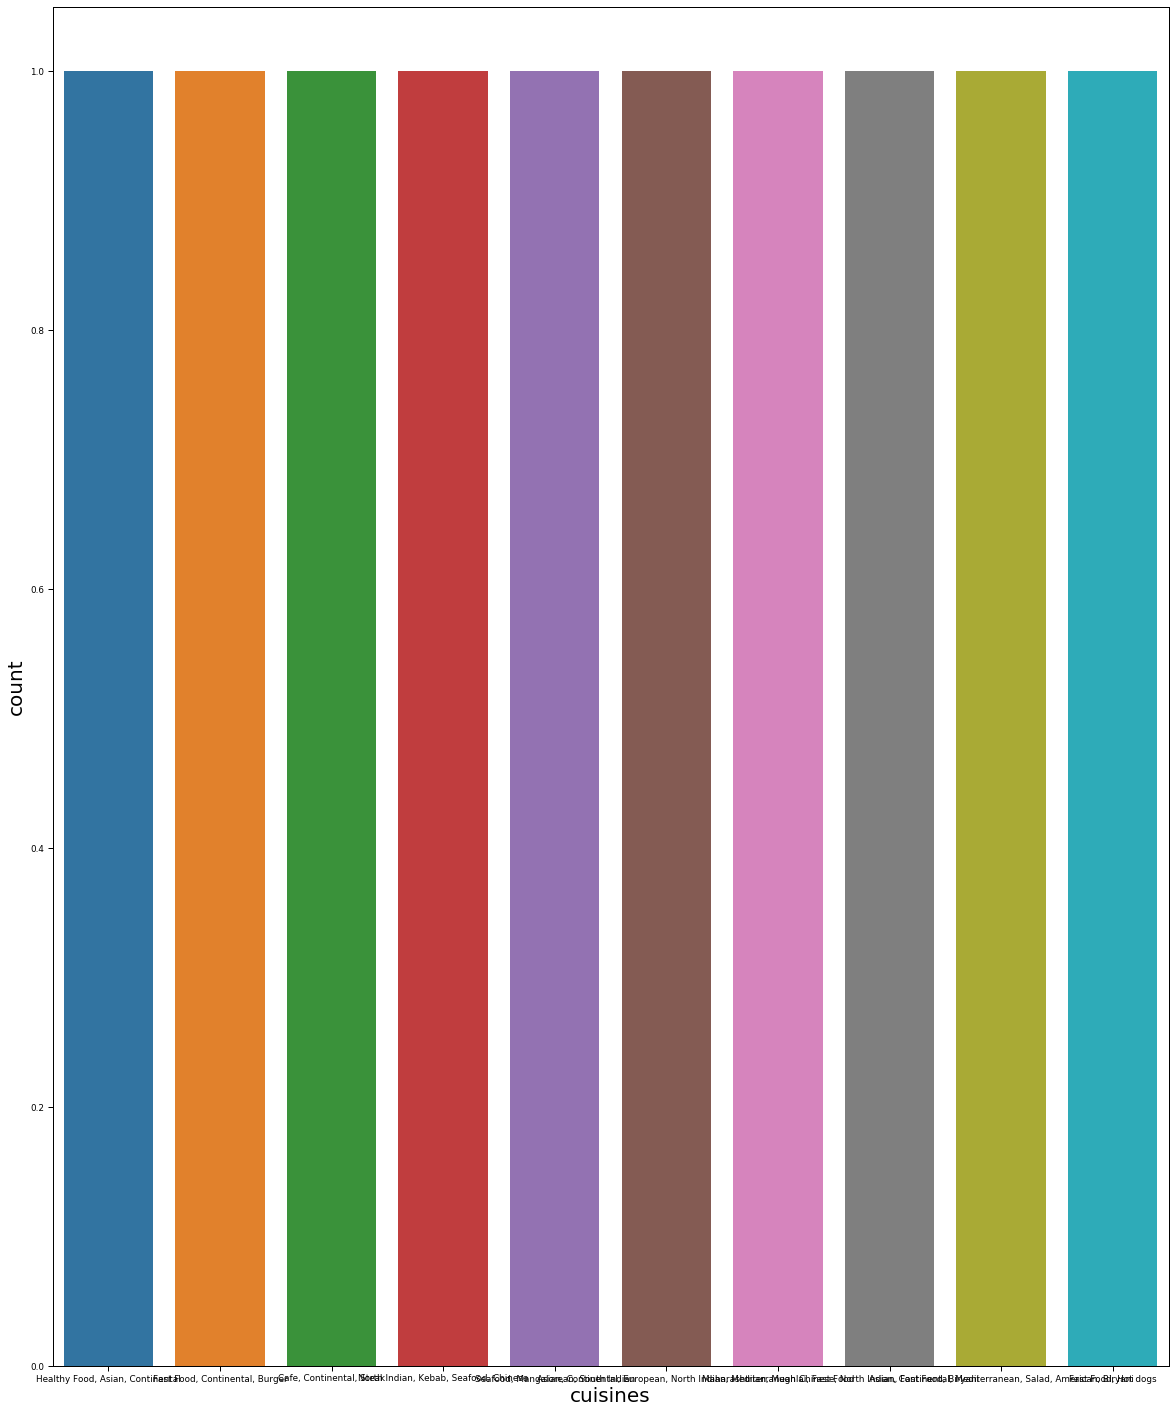

In [87]:
b=sns.countplot(data = df, x = 'cuisines', order=df['cuisines'].value_counts().tail(10).iloc[:10].index)
b.set_xticklabels(b.get_xticklables(),rotation=90)
plt.title("top 10 cuisines with max number of restros")
plt.show()

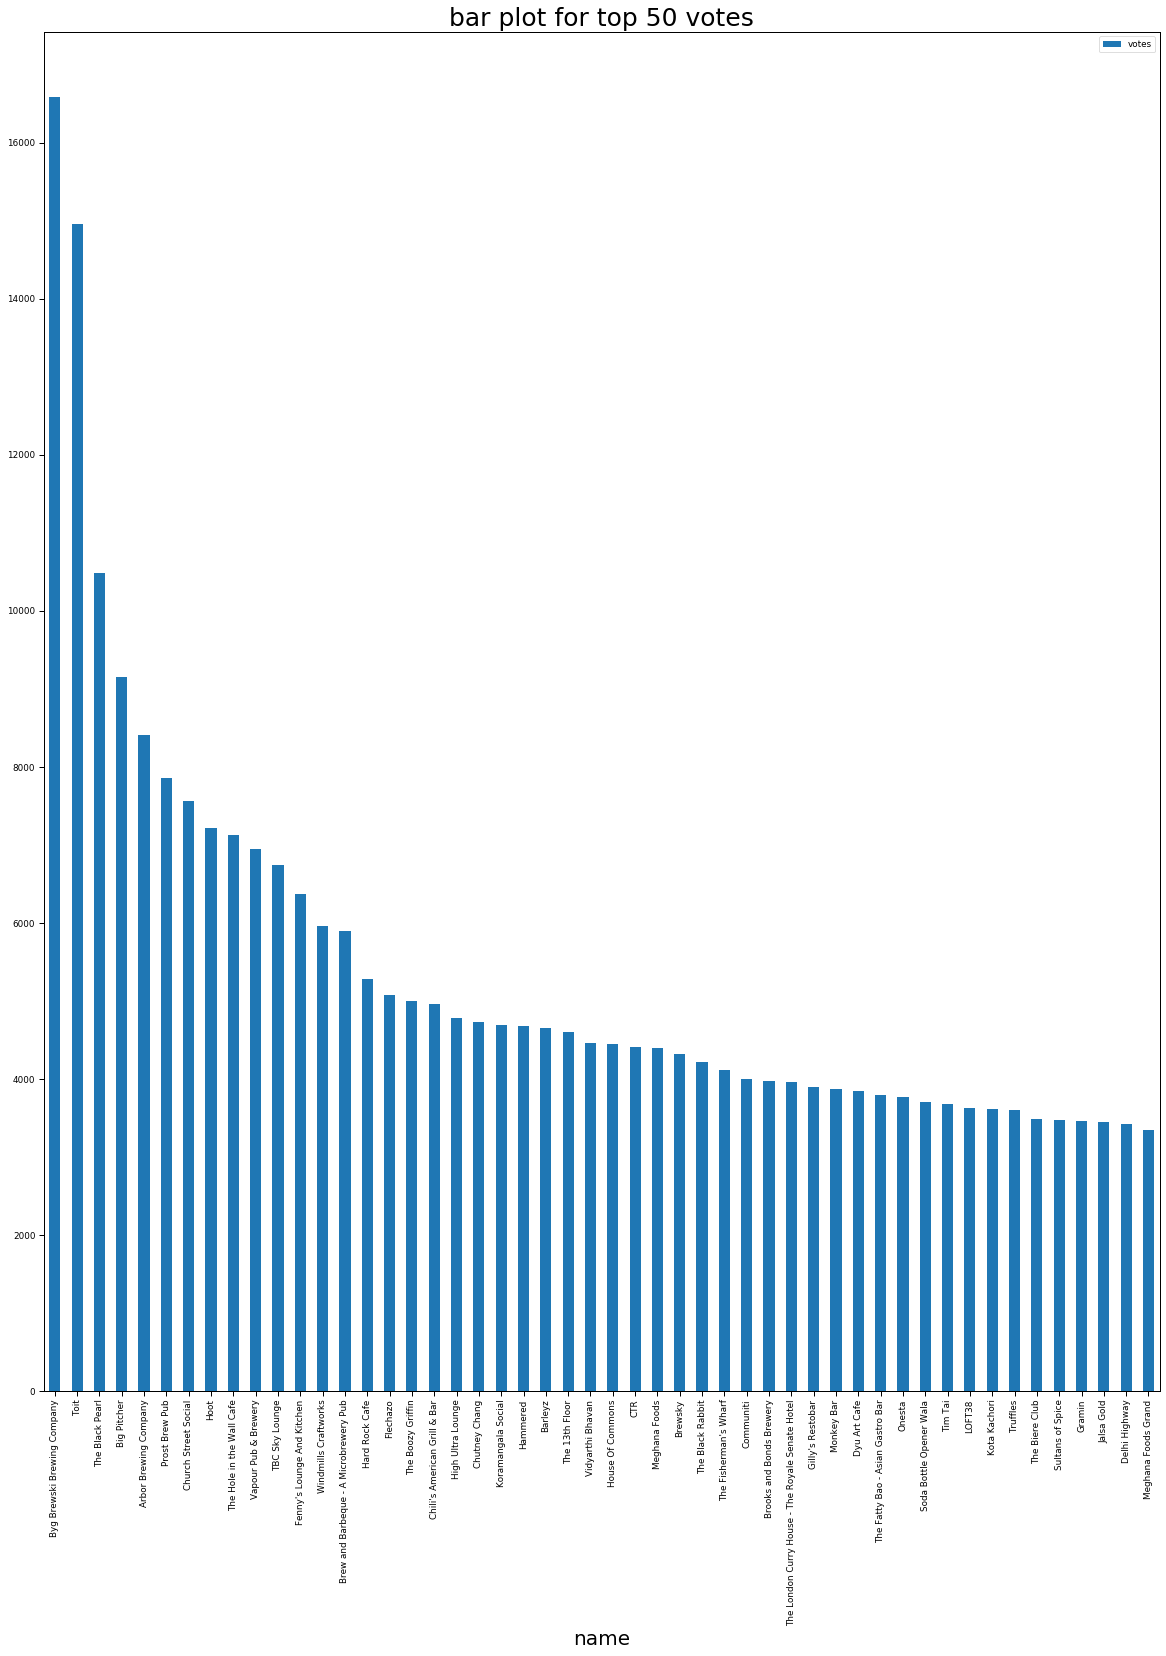

In [89]:
df[['votes','name']].groupby(['name']).median().sort_values("votes",ascending=False).head(50).plot.bar()
plt.title('bar plot for top 50 votes')
plt.show()

In [90]:
b =[]
a = df.iloc[:, :].values
for i in range(0, len(a)):
    if a[i][0] == 'Byg Brewski Brewing Company' or a[i][0] == 'Byg Brewski Brewing Company' or a[i][0] == 'Byg Brewski Brewing Company':
        b.append(list(a[i]))

In [91]:
b = pd.DataFrame(b)
b.columns = df.columns

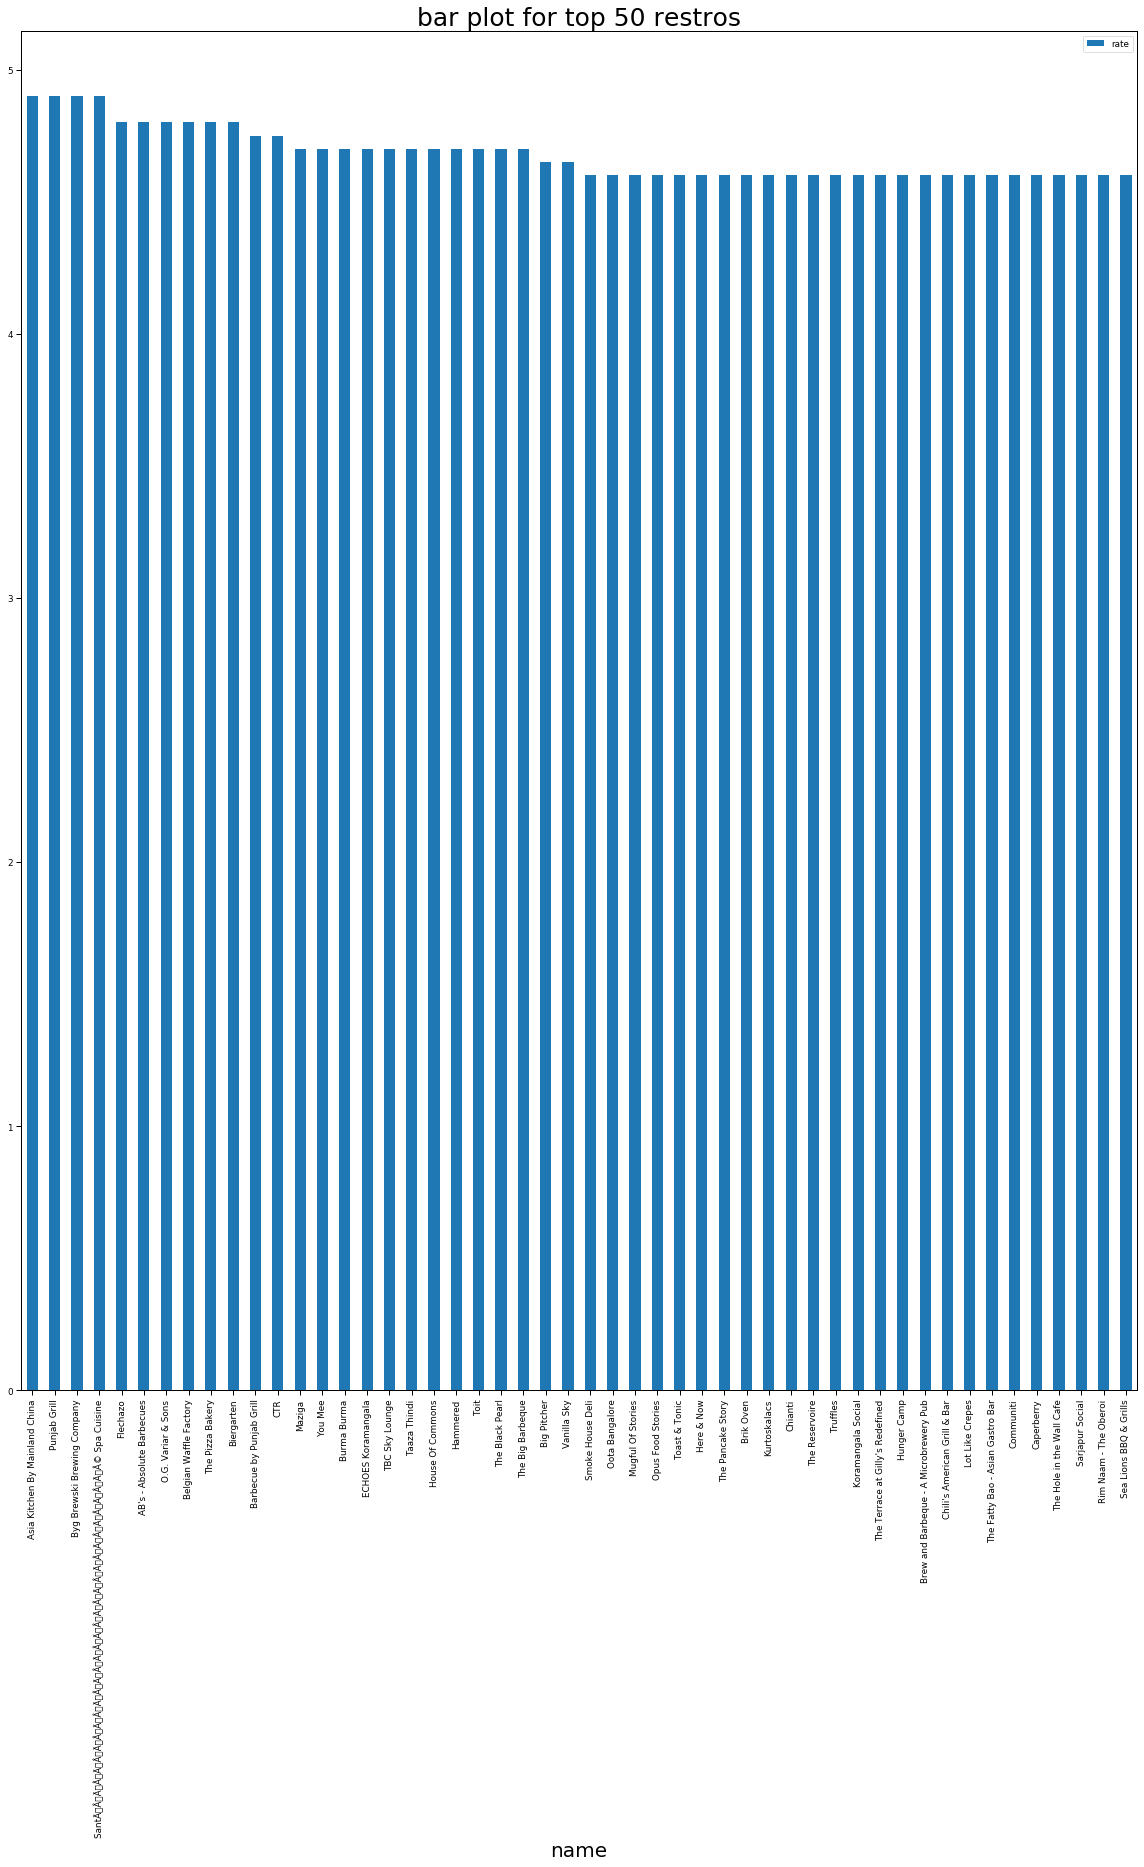

In [93]:
df[['rate','name']].groupby(['name']).median().sort_values("rate",ascending=False).head(50).plot.bar()
plt.title('bar plot for top 50 restros')
plt.show()

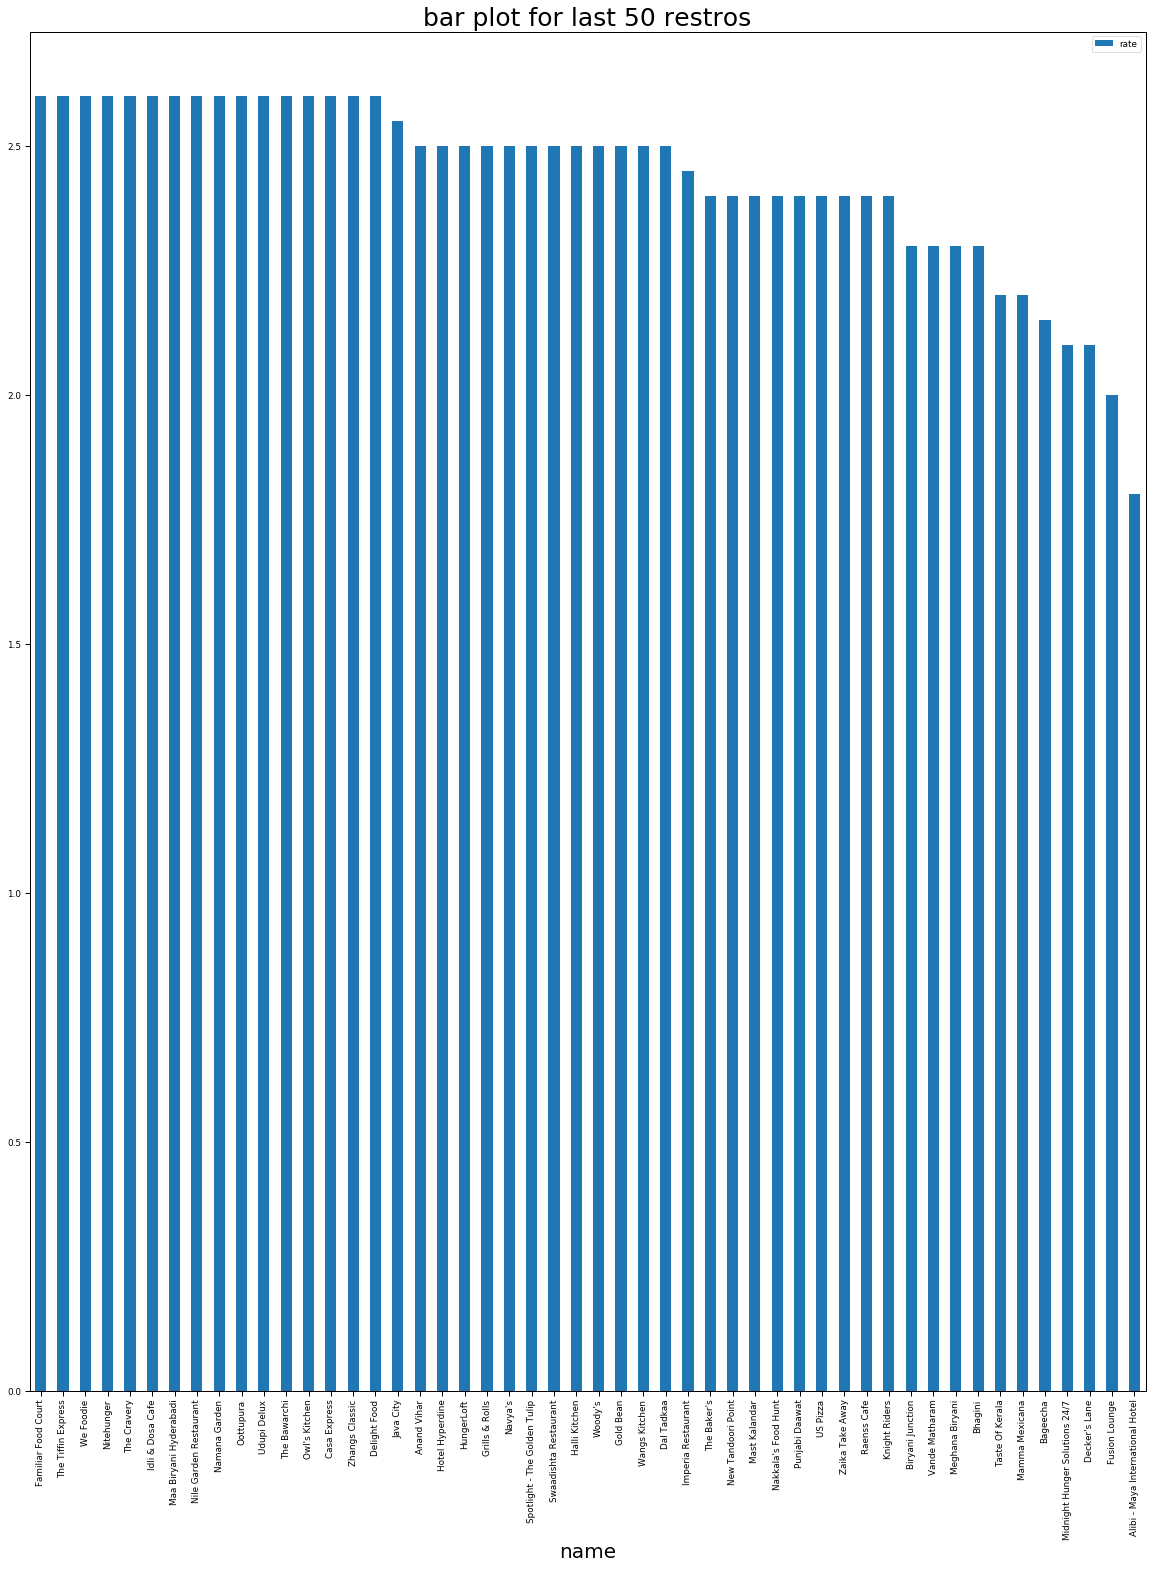

In [95]:
a = pd.DataFrame(df['rate'])
a['name']=df['name']
a = a.dropna(axis=0,how='any')
a[['rate','name']].groupby(['name']).median().sort_values("rate",ascending=False).tail(50).plot.bar()
plt.title('bar plot for last 50 restros')
plt.show()

In [98]:
df['Avg_cost'] = df['Avg_cost'].apply(lambda x:str(x).replace(',',''))
a = list(df['Avg_cost'])
for i in range(0, len(a)):
    if a[i] !='nan':
        a[i]= int(a[i])
    else:
        a[i] = None
df['Avg_cost'] = a

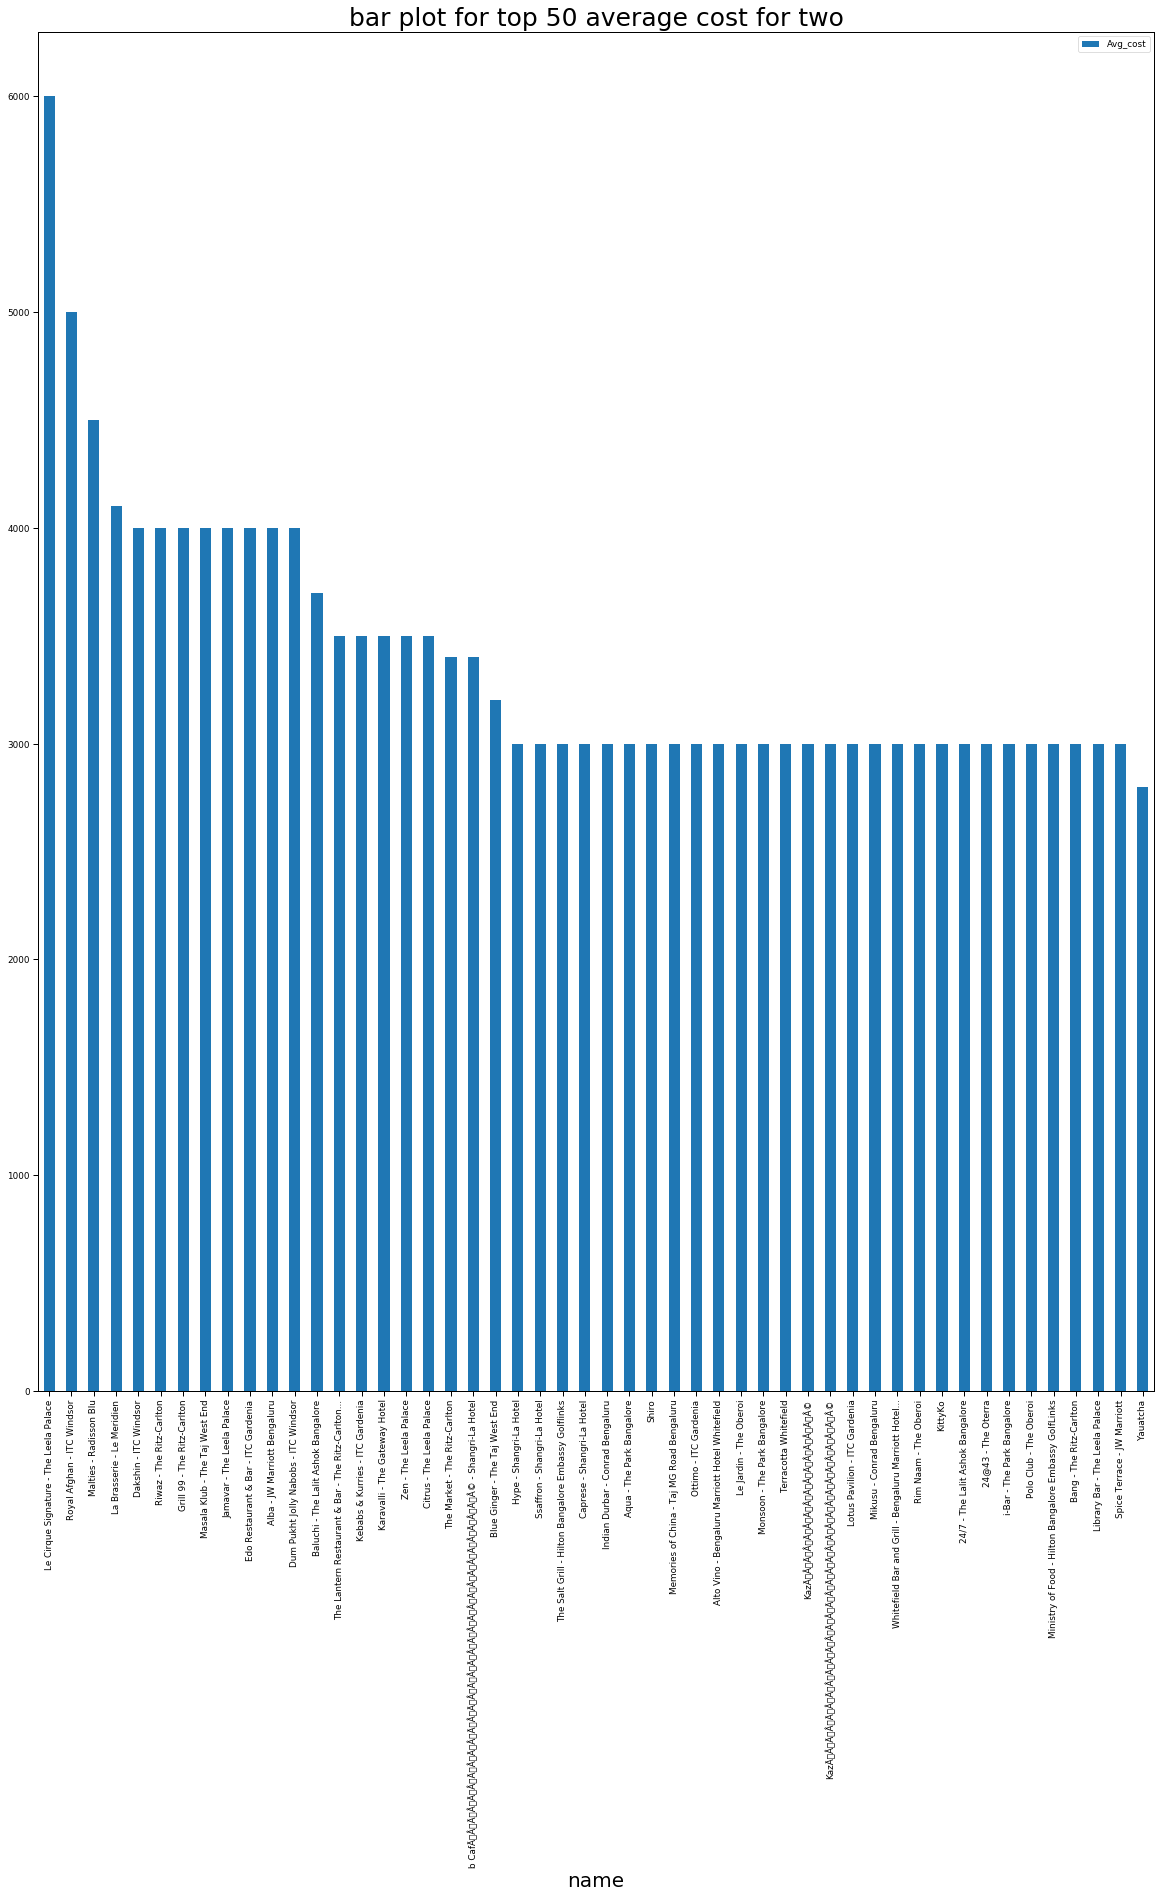

In [99]:
df[['Avg_cost','name']].groupby(['name']).median().sort_values("Avg_cost",ascending=False).head(50).plot.bar()
plt.title('bar plot for top 50 average cost for two')
plt.show()

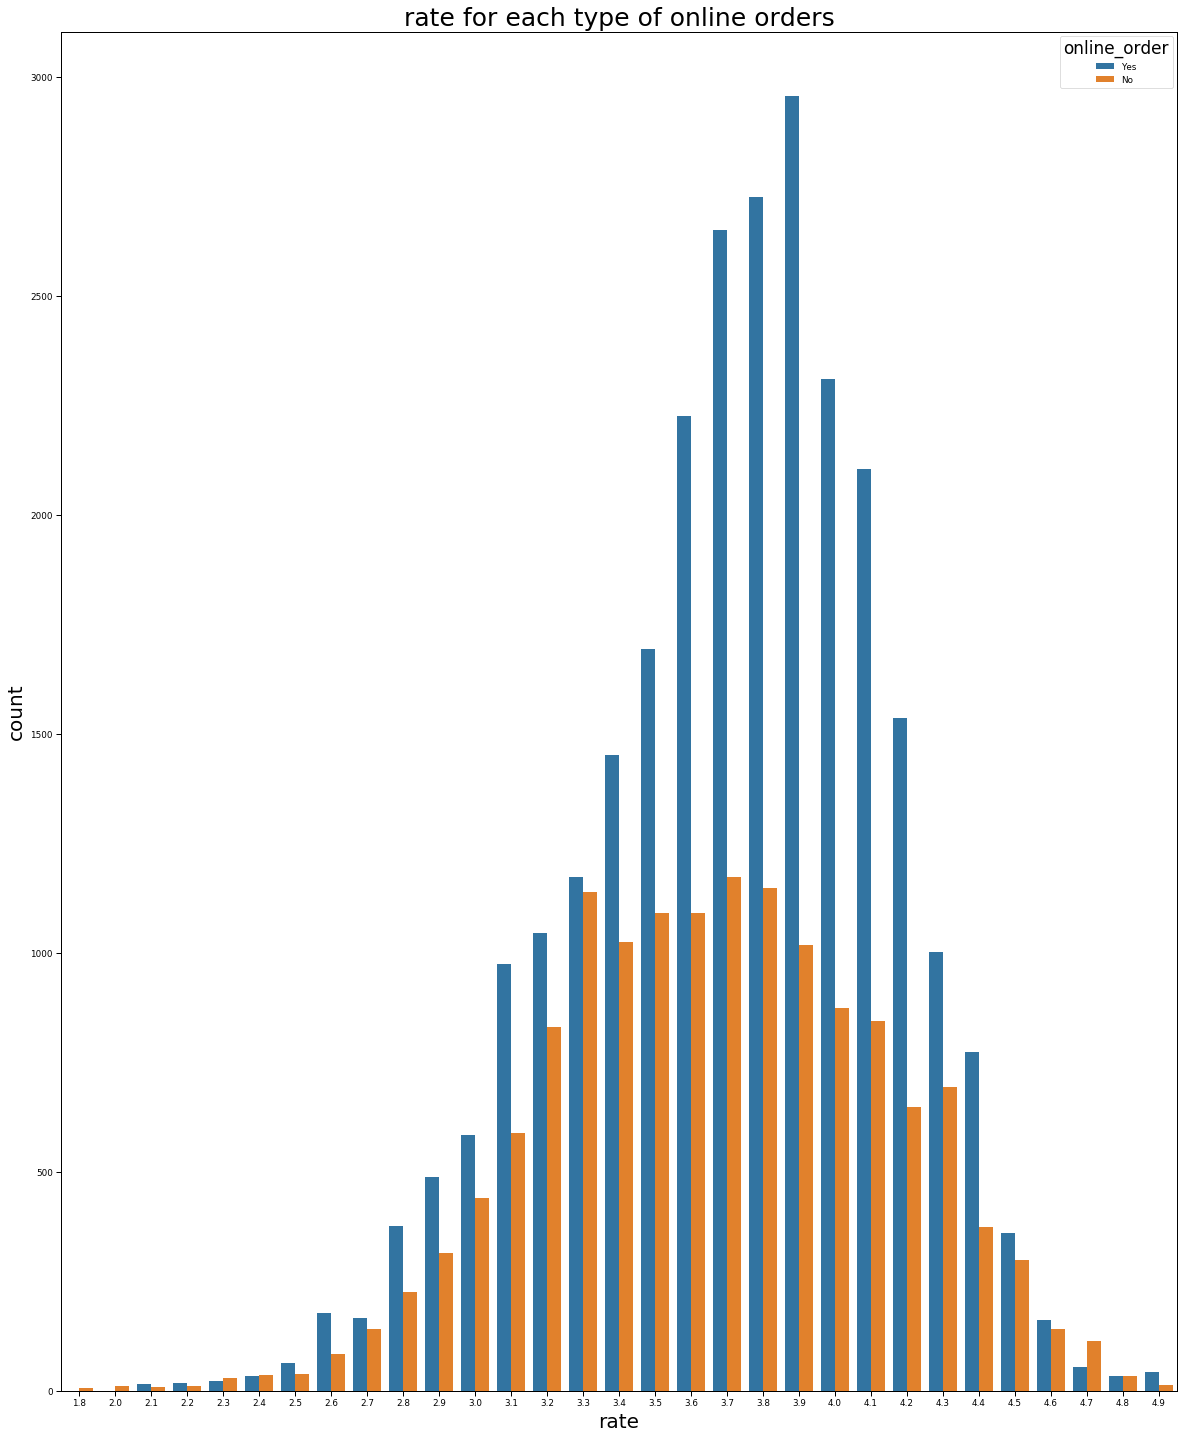

In [101]:
sns.countplot(data = df, hue='online_order', x = 'rate')
plt.title("rate for each type of online orders")
plt.show()

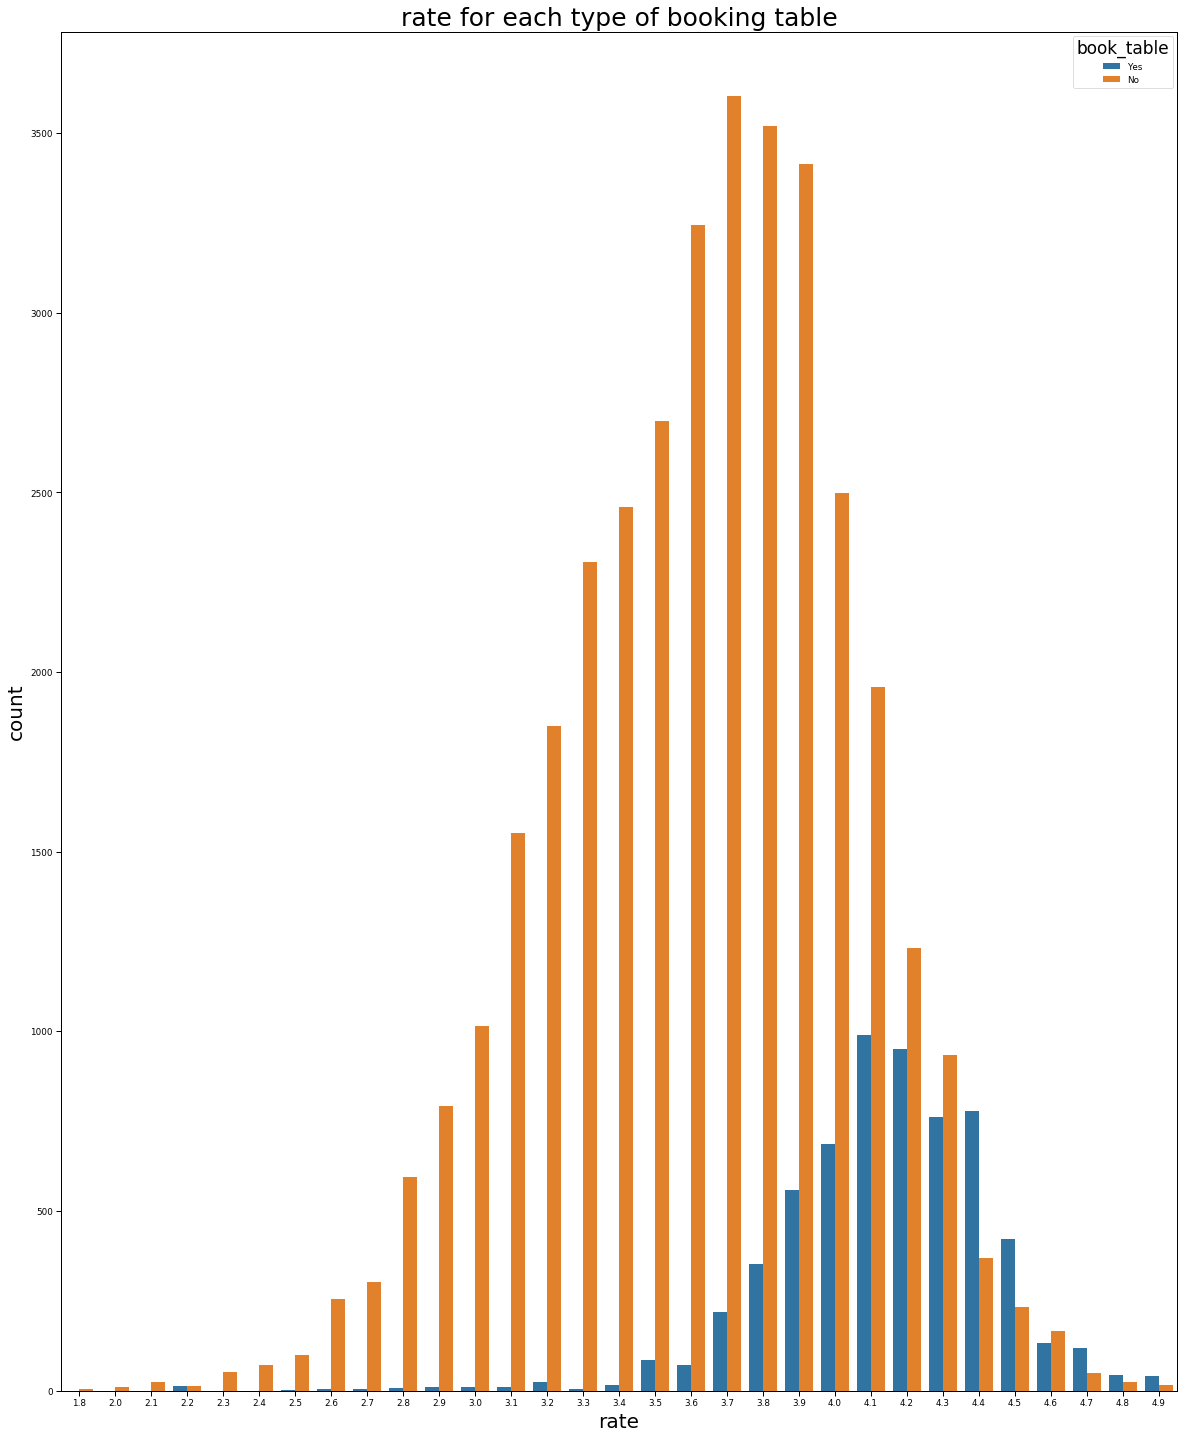

In [102]:
sns.countplot(data = df, hue='book_table', x = 'rate')
plt.title("rate for each type of booking table")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_xticklables'

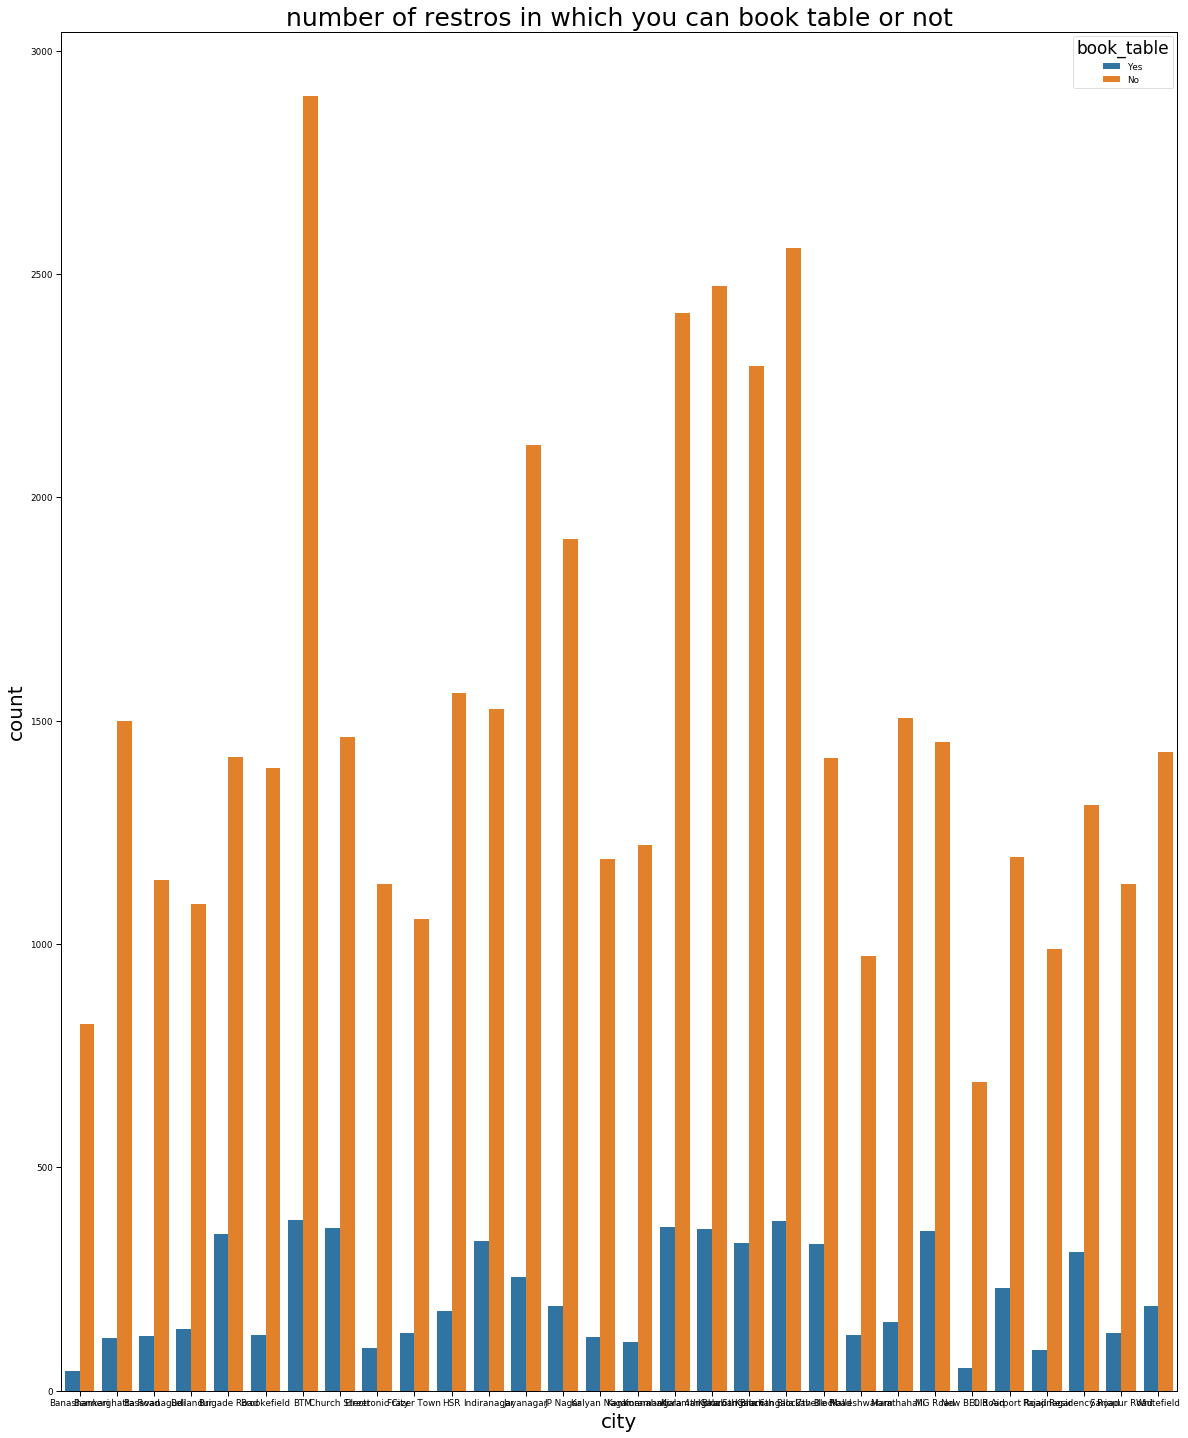

In [105]:
sns.set_context("paper", font_scale =1,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b=sns.countplot(data = df, x = 'city', hue = 'book_table')
plt.title('number of restros in which you can book table or not')
b.set_xticklabels(b.get_xticklables(),rotation= 90)
plt.show()

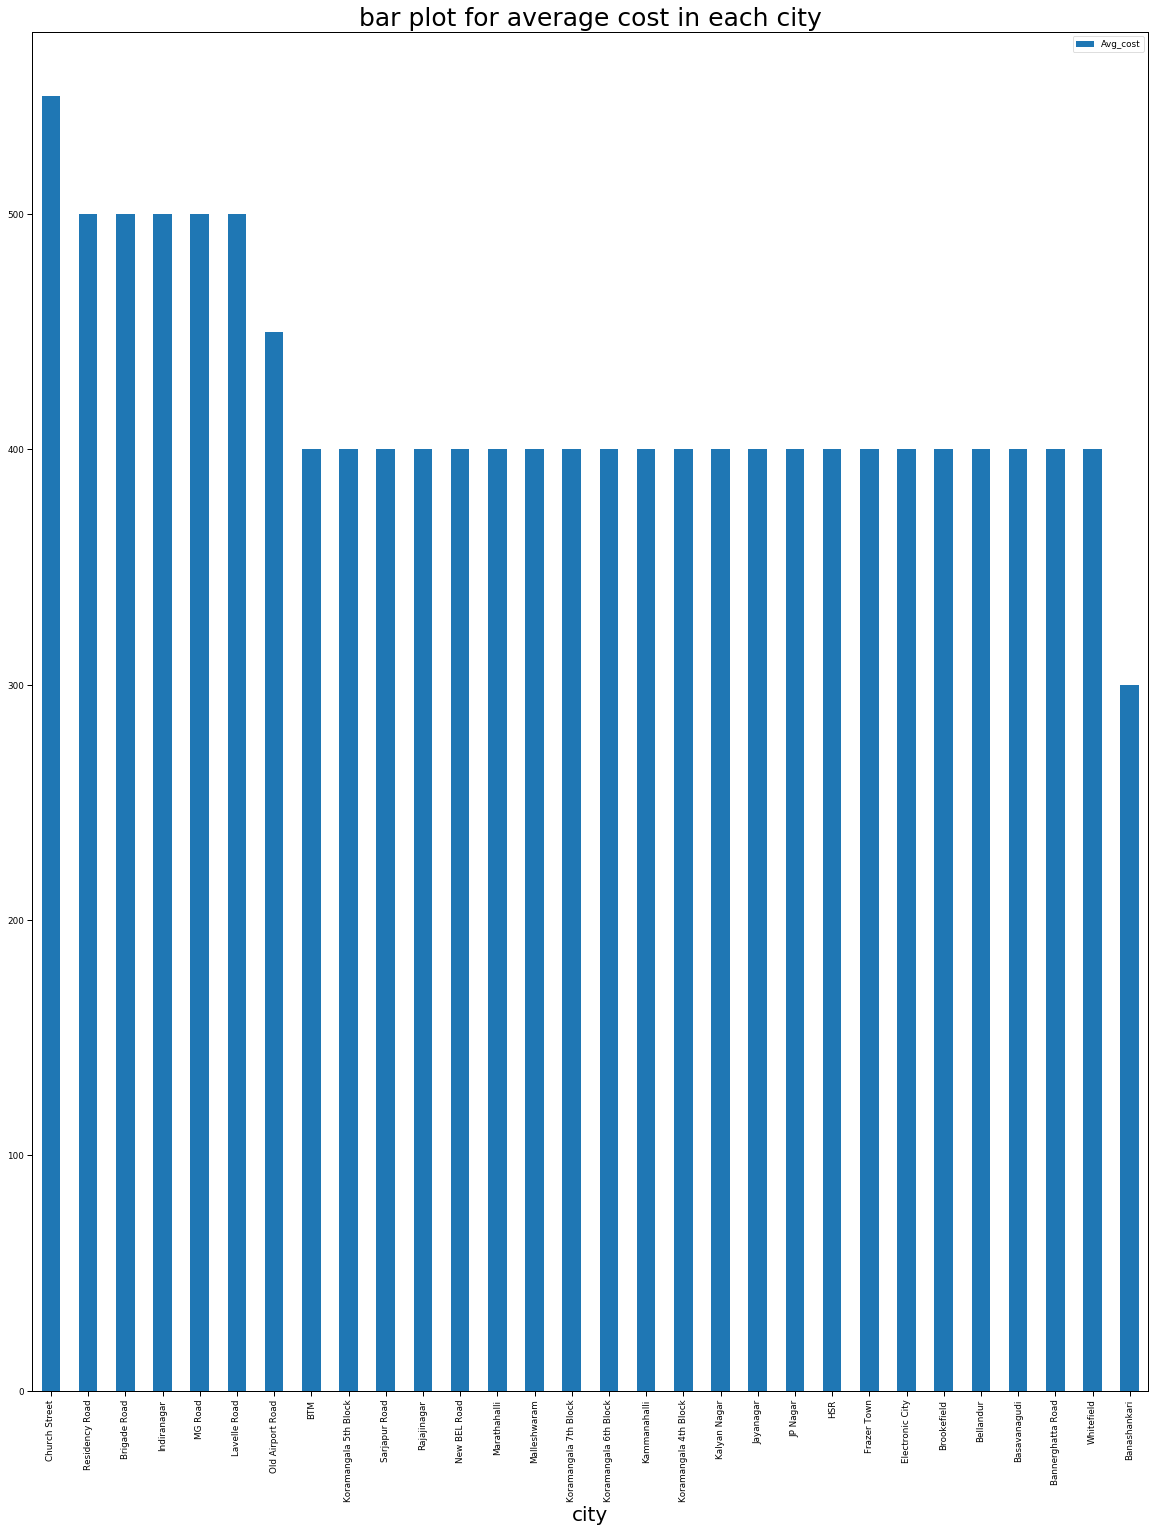

In [106]:
df[['Avg_cost','city']].groupby(['city']).median().sort_values("Avg_cost",ascending=False).plot.bar()
plt.title('bar plot for average cost in each city')
plt.show()

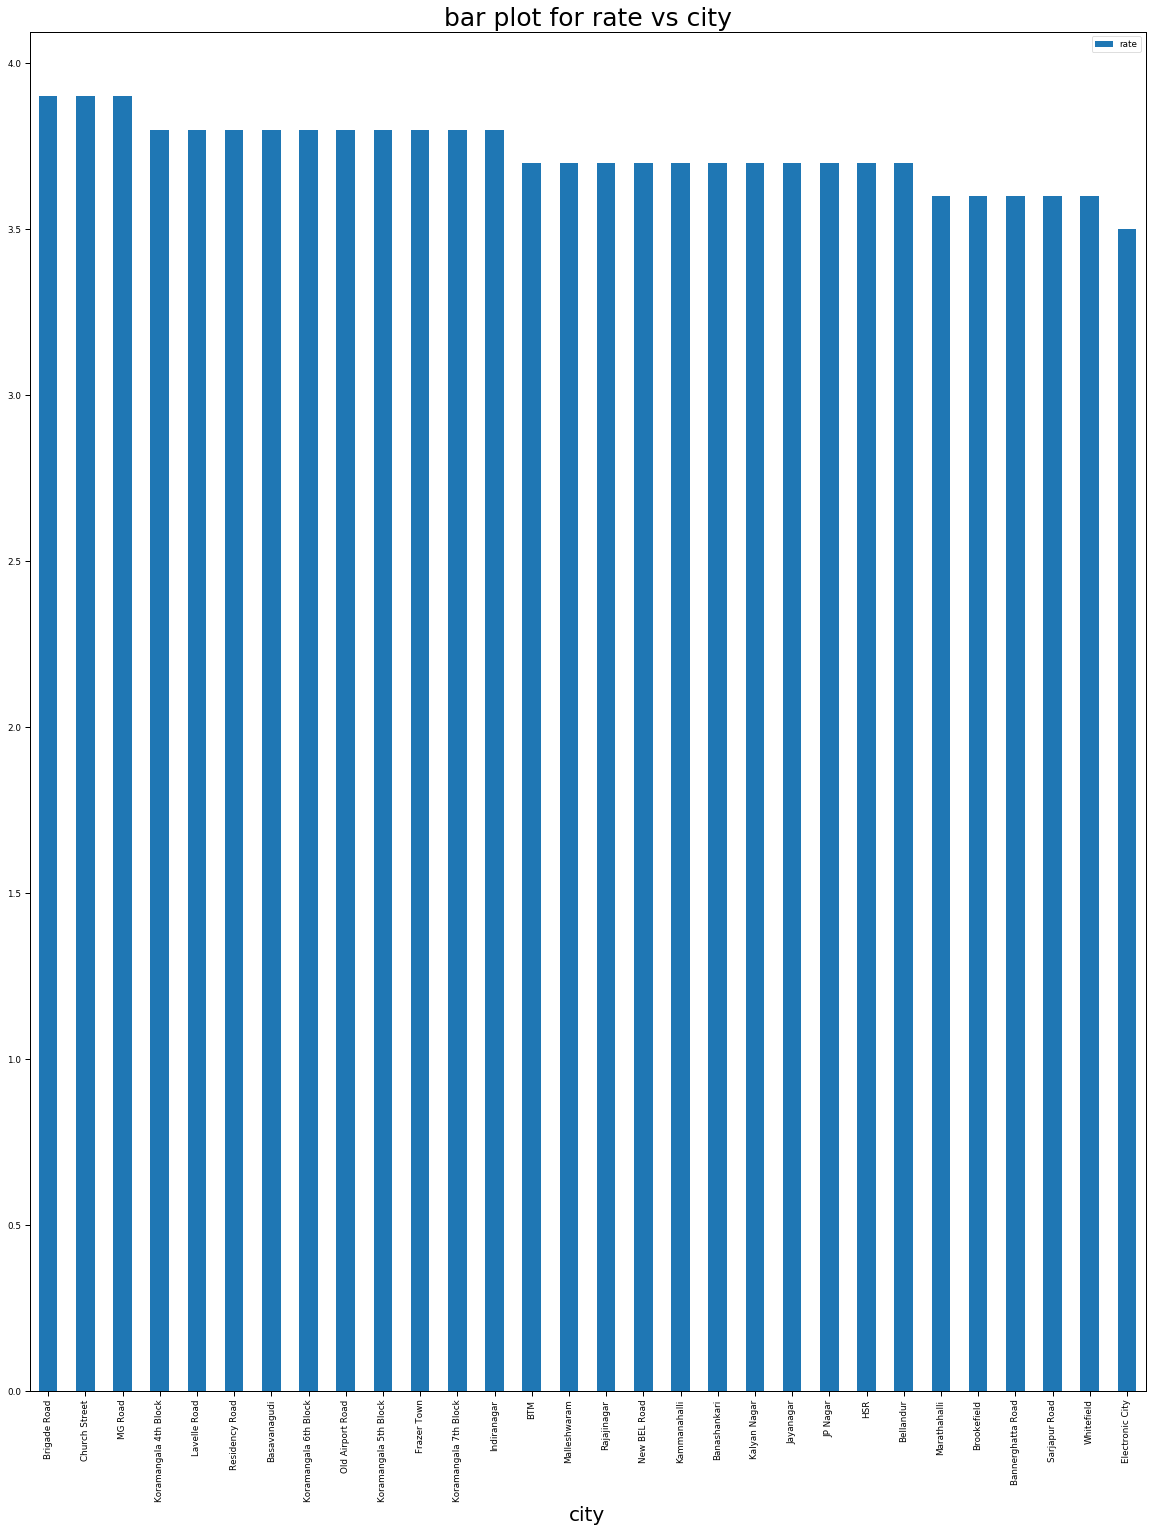

In [107]:
df[['rate','city']].groupby(['city']).median().sort_values("rate",ascending=False).plot.bar()
plt.title('bar plot for rate vs city')
plt.show()

In [112]:
a = df.iloc[:,:].values
for i in range(0,len(a)):
    if a[i,6]=='Friendly Staff':
        print(a[i,6])
        a[i,6]= None

Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly Staff
Friendly S

In [113]:
a = pd.DataFrame(a)
a.columns= df.columns

AttributeError: 'AxesSubplot' object has no attribute 'get_xticklables'

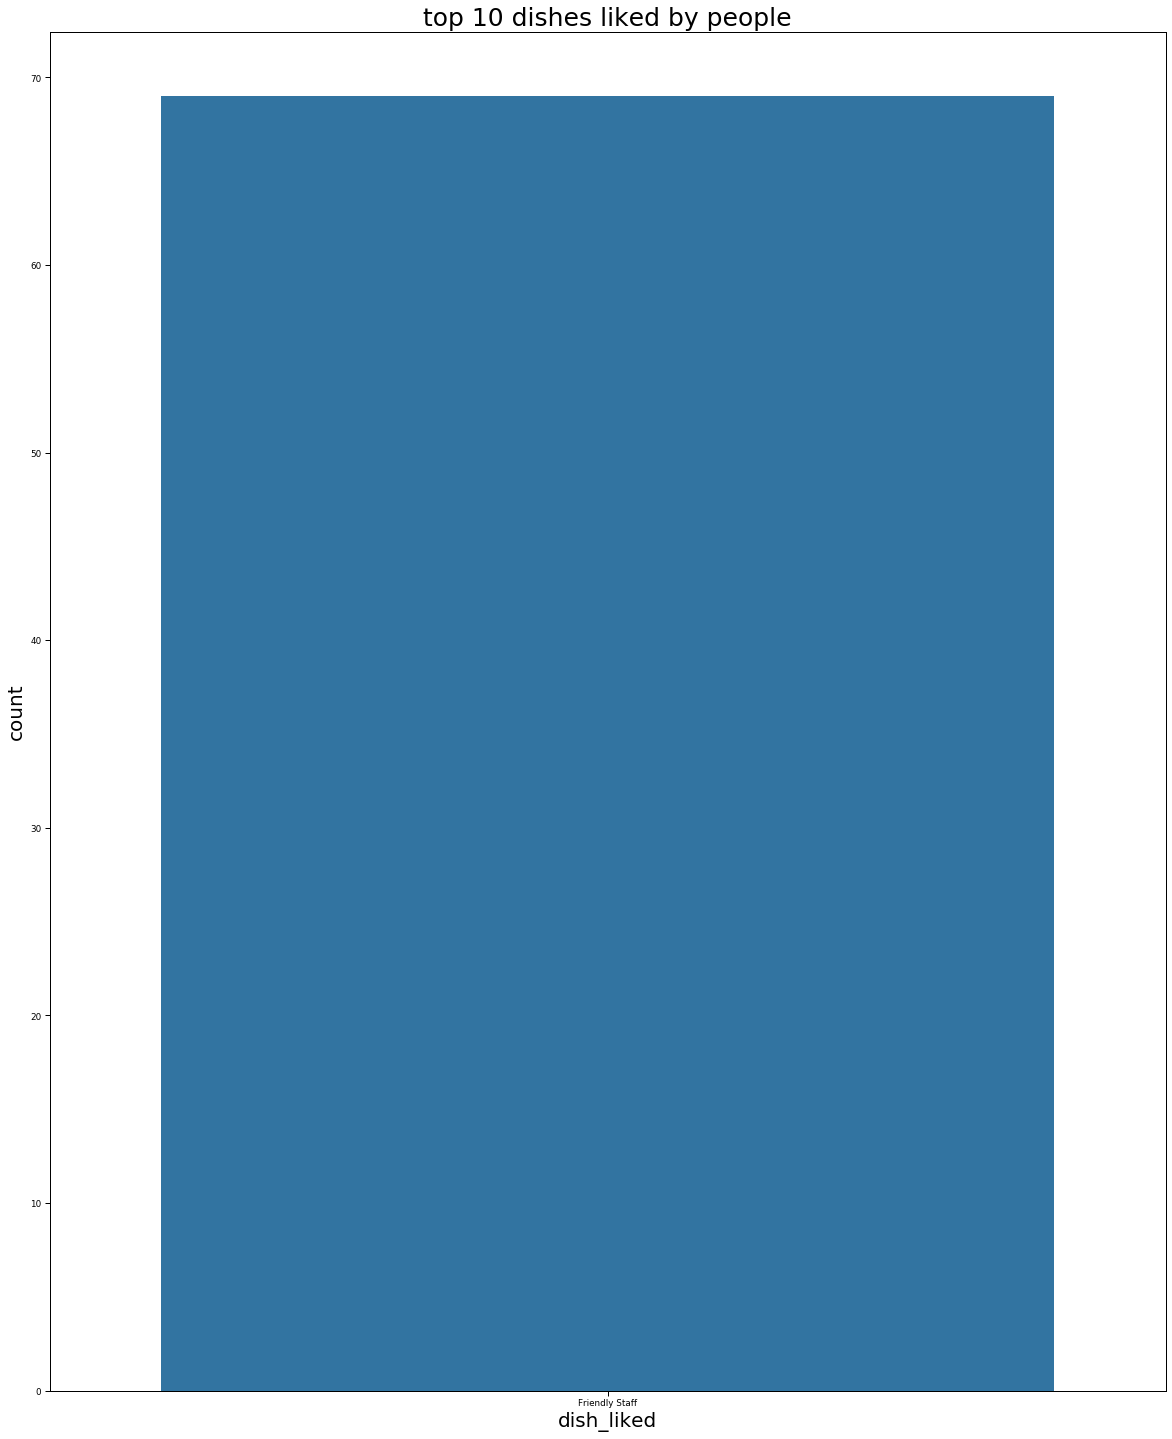

In [111]:
sns.set_context("paper", font_scale =1,rc = {'font_size':20,"axes.titlesize":25,"axes.labelsize":20})
b=sns.countplot(data = a, x = 'dish_liked', order = a.dish_liked.value_counts().iloc[:10].index)
plt.title('top 10 dishes liked by people')
b.set_xticklabels(b.get_xticklables(),rotation= 90)
plt.show()